##Exercise 1
**part1**

In [4]:
def is_subset_sum_recursive(arr, n, target, subset=[]):
    # Base Cases
    if target == 0:
        print("Subset with the given sum exists:", subset)
        return True
    if n == 0 and target != 0:
        return False
    # If last element is greater than target, ignore it
    if arr[n - 1] > target:
        return is_subset_sum_recursive(arr, n - 1, target, subset)
    # Check if sum can be obtained by including or excluding the last element
    return (is_subset_sum_recursive(arr, n - 1, target, subset) or
            is_subset_sum_recursive(arr, n - 1, target - arr[n - 1], subset + [arr[n - 1]]))



**part2**

In [9]:
import time

# Algorithm 1: Recursive approach
def is_subset_sum_recursive(arr, n, target, subset=[]):
    # Base Cases
    if target == 0:
        print("Subset with the given sum exists:", subset)
        return True
    if n == 0 and target != 0:
        return False
    # If last element is greater than target, ignore it
    if arr[n - 1] > target:
        return is_subset_sum_recursive(arr, n - 1, target, subset)
    # Check if sum can be obtained by including or excluding the last element
    return (is_subset_sum_recursive(arr, n - 1, target, subset) or
            is_subset_sum_recursive(arr, n - 1, target - arr[n - 1], subset + [arr[n - 1]]))

# Given sets and targets
sets = [
    [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24],
    [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23],
    [3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24],
    [2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24]
]
targets = [140, 165, 182]

# Apply algorithm for each set and each target
for i, s in enumerate(sets):
    for t in targets:
        start_time = time.time()
        print(f"Set {i+1}, Target {t}:")
        found_recursive = is_subset_sum_recursive(s, len(s), t)
        if not found_recursive:
            print("No Subset Found with given sum (Recursive)")
        end_time = time.time()
        print("Time taken (Recursive):", end_time - start_time, "seconds")
        print()




Set 1, Target 140:
Subset with the given sum exists: [22, 20, 18, 16, 14, 12, 9, 9, 8, 6, 4, 2]
Time taken (Recursive): 0.014176368713378906 seconds

Set 1, Target 165:
Subset with the given sum exists: [24, 22, 20, 16, 14, 12, 10, 9, 9, 9, 8, 6, 4, 2]
Time taken (Recursive): 0.0216825008392334 seconds

Set 1, Target 182:
No Subset Found with given sum (Recursive)
Time taken (Recursive): 0.022544145584106445 seconds

Set 2, Target 140:
Subset with the given sum exists: [21, 17, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
Time taken (Recursive): 0.009466886520385742 seconds

Set 2, Target 165:
Subset with the given sum exists: [23, 21, 19, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
Time taken (Recursive): 0.01955699920654297 seconds

Set 2, Target 182:
Subset with the given sum exists: [23, 21, 19, 17, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
Time taken (Recursive): 0.0225069522857666 seconds

Set 3, Target 140:
Subset with the given sum exists: [18, 17, 17, 17, 15, 12, 11, 11, 9, 6, 4, 3]
Time ta

**part3**

In [6]:
def subset_sum(numbers, target_sum):
    n = len(numbers)
    dp = [[False] * (target_sum + 1) for _ in range(n + 1)]
    # Base case initialization (when sum is 0)
    for i in range(n + 1):
        dp[i][0] = True
    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            # If the current number is greater than the target sum,
            # then the current number cannot be included in the subset
            if numbers[i - 1] > j:
                dp[i][j] = dp[i - 1][j]
            else:
                # Check if it's possible to achieve the target sum
                # by either including or excluding the current number
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - numbers[i - 1]]
    # Trace back to find the elements included in the subset sum
    subset = []
    i, j = n, target_sum
    while i > 0 and j > 0:
        if dp[i][j] and not dp[i - 1][j]:
            subset.append(numbers[i - 1])
            j -= numbers[i - 1]
        i -= 1
    return dp[n][target_sum], subset[::-1]


**part4**

In [7]:
import time

# Algorithm 2: Dynamic programming approach
def subset_sum(numbers, target_sum):
    n = len(numbers)
    dp = [[False] * (target_sum + 1) for _ in range(n + 1)]
    # Base case initialization (when sum is 0)
    for i in range(n + 1):
        dp[i][0] = True
    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            # If the current number is greater than the target sum,
            # then the current number cannot be included in the subset
            if numbers[i - 1] > j:
                dp[i][j] = dp[i - 1][j]
            else:
                # Check if it's possible to achieve the target sum
                # by either including or excluding the current number
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - numbers[i - 1]]
    # Trace back to find the elements included in the subset sum
    subset = []
    i, j = n, target_sum
    while i > 0 and j > 0:
        if dp[i][j] and not dp[i - 1][j]:
            subset.append(numbers[i - 1])
            j -= numbers[i - 1]
        i -= 1
    return dp[n][target_sum], subset[::-1]

# Given sets and targets
sets = [
    [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24],
    [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23],
    [3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24],
    [2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24]
]
targets = [140, 165, 182]

# Apply algorithm for each set and each target
for i, s in enumerate(sets):
    for t in targets:
        start_time = time.time()
        print(f"Set {i+1}, Target {t}:")
        found_dp, subset = subset_sum(s, t)
        if found_dp:
            print("Subset Found:", subset)
        else:
            print("No Subset Found with given sum")
        end_time = time.time()
        print("Time taken:", end_time - start_time, "seconds")
        print()


Set 1, Target 140:
Subset Found: [2, 4, 6, 8, 9, 9, 12, 14, 16, 18, 20, 22]
Time taken: 0.002705812454223633 seconds

Set 1, Target 165:
Subset Found: [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 20, 22, 24]
Time taken: 0.003331422805786133 seconds

Set 1, Target 182:
No Subset Found with given sum
Time taken: 0.0008442401885986328 seconds

Set 2, Target 140:
Subset Found: [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 21]
Time taken: 0.0006542205810546875 seconds

Set 2, Target 165:
Subset Found: [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 19, 21, 23]
Time taken: 0.0007565021514892578 seconds

Set 2, Target 182:
Subset Found: [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23]
Time taken: 0.0008084774017333984 seconds

Set 3, Target 140:
Subset Found: [3, 4, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18]
Time taken: 0.0006301403045654297 seconds

Set 3, Target 165:
Subset Found: [3, 4, 6, 9, 11, 11, 12, 15, 17, 17, 18, 21, 21]
Time taken: 0.0007321834564208984 seconds

Set 3, Target 182:
Subset Found: [

**part5**

In [10]:
# Sets and Targets
Set1 = {2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24}
Set2 = {3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23}
Set3 = {3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24}
Set4 = {2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24}

Target1 = 140
Target2 = 165
Target3 = 182

# List of Sets
sets = [Set1, Set2, Set3, Set4]

# List of Targets
targets = [Target1, Target2, Target3]


In [15]:
import matplotlib.pyplot as plt

# Worst-case time taken for Recursive approach
recursive_times = [
    [0.014176368713378906, 0.0216825008392334, 0.022544145584106445],
    [0.009466886520385742, 0.01955699920654297, 0.0225069522857666],
    [0.006175994873046875, 0.020821809768676758, 0.022557497024536133],
    [0.010591983795166016, 0.02103590965270996, 0.024929523468017578]
]

# Worst-case time taken for Dynamic Programming approach
dp_times = [
    [0.002705812454223633, 0.003331422805786133, 0.0008442401885986328],
    [0.0006542205810546875, 0.0007565021514892578, 0.0008084774017333984],
    [0.0006301403045654297, 0.0007321834564208984, 0.0008404254913330078],
    [0.0006623268127441406, 0.0007598400115966797, 0.0008244514465332031]
]

# Input sizes (number of elements in each set)
input_sizes = [len(s) for s in sets]



# Transpose recursive_times
recursive_times_transpose = list(map(list, zip(*recursive_times)))

# Input sizes (number of elements in each set)
input_sizes = [len(s) for s in sets]



In [16]:
dp_times_transpose = list(map(list, zip(*dp_times)))



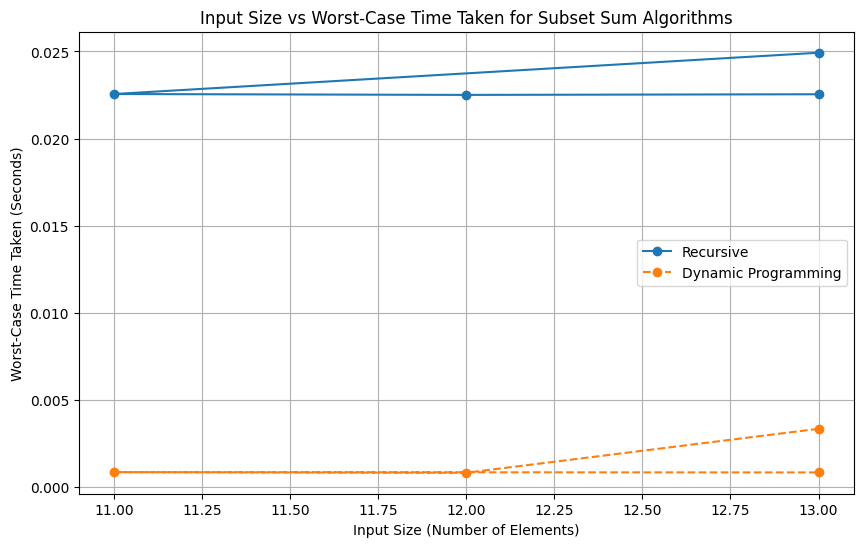

In [17]:
import matplotlib.pyplot as plt

# Function to find the maximum time taken for each input size
def find_max_times(times):
    max_times = []
    for i in range(len(times[0])):
        max_time = max([times[j][i] for j in range(len(times))])
        max_times.append(max_time)
    return max_times

# Find the maximum times for Recursive and DP approaches
max_recursive_times = find_max_times(recursive_times_transpose)
max_dp_times = find_max_times(dp_times_transpose)

# Plotting the graph
plt.figure(figsize=(10, 6))

# Plot Recursive approach
plt.plot(input_sizes, max_recursive_times, marker='o', label='Recursive')

# Plot Dynamic Programming approach
plt.plot(input_sizes, max_dp_times, marker='o', linestyle='--', label='Dynamic Programming')

plt.title('Input Size vs Worst-Case Time Taken for Subset Sum Algorithms')
plt.xlabel('Input Size (Number of Elements)')
plt.ylabel('Worst-Case Time Taken (Seconds)')
plt.legend()
plt.grid(True)
plt.show()
